### Data Prepare (Metric, Config)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

In [2]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)


In [3]:
# metrics = metrics.replace([np.inf],9999999)
metrics = metrics.replace([np.inf],9999999)


metrics


,tps,latency
0,0.216666,20847397
1,0.322221,12744942
2,3789.313102,1076
3,0.166667,12510551
4,0.266666,10686198
...,...,...
995,0.138889,11836756
996,0.149999,16386967
997,0.227778,19293708
998,0.188888,10529195


### Data Prepare (Config)

In [4]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_AA/configs/my_*.cnf")


In [5]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_AA/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


- all_samples = config + metrics

In [6]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,91200,8000,63,7680,163577856,57344,104448,1,0.138889,11836756
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,89600,2000,29,11520,230686720,69632,61440,0,0.149999,16386967
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,66000,8000,48,12544,536870912,81920,108544,1,0.227778,19293708
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,70400,2000,57,3840,218103808,36864,63488,1,0.188888,10529195


In [7]:
### boolean에 해당하는 열 정리

discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

In [8]:
### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [9]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [10]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data #1000)

In [11]:
# print(metrics['tps'].min() , metrics['tps'].max())
# print(metrics['latency'].min() , metrics['latency'].max())


In [13]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])


predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test))
print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))




epoch 0  | loss: 1.22257 | val_0_mse: 0.16483 |  0:00:00s
epoch 10 | loss: 0.05438 | val_0_mse: 0.07645 |  0:00:01s
epoch 20 | loss: 0.03859 | val_0_mse: 0.07564 |  0:00:02s
epoch 30 | loss: 0.01657 | val_0_mse: 0.07987 |  0:00:03s
epoch 40 | loss: 0.01162 | val_0_mse: 0.07471 |  0:00:04s
epoch 50 | loss: 0.01199 | val_0_mse: 0.0591  |  0:00:05s
epoch 60 | loss: 0.01219 | val_0_mse: 0.04938 |  0:00:06s
epoch 70 | loss: 0.0112  | val_0_mse: 0.04973 |  0:00:07s
epoch 80 | loss: 0.01153 | val_0_mse: 0.03904 |  0:00:08s
epoch 90 | loss: 0.01372 | val_0_mse: 0.02073 |  0:00:09s
epoch 100| loss: 0.01079 | val_0_mse: 0.01792 |  0:00:10s
epoch 110| loss: 0.00684 | val_0_mse: 0.01875 |  0:00:11s
epoch 120| loss: 0.01135 | val_0_mse: 0.01701 |  0:00:12s
epoch 130| loss: 0.00764 | val_0_mse: 0.02171 |  0:00:13s
epoch 140| loss: 0.0074  | val_0_mse: 0.02463 |  0:00:14s
epoch 150| loss: 0.00551 | val_0_mse: 0.01964 |  0:00:15s
epoch 160| loss: 0.00524 | val_0_mse: 0.0253  |  0:00:16s
epoch 170| los

In [14]:
from sklearn.metrics import r2_score

#Column 0 :TPS
#Column 1 : Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.9304323824151762
Column 1 R2 Score: 0.8876223438569436


### LHS SAMPLING (make samples #4000)

In [15]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']


In [16]:
knob_info

,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [23]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        
    
#np.random.seed(72)
    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    
    for fidx in range(nfeats):
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples

A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)


In [18]:
len(mm_sample)

4000

In [37]:
# mm_sample[0]
type(mm_sample)

numpy.ndarray

In [24]:
sample_list = []
for ll in mm_sample:
    val = list(ll.values())
    sample_list.append(val)
# sample_list = [ll]

In [25]:
samples = sample_list
samples = np.array(samples)

In [36]:

samples[0]

array([          1,        2121,     8604264,      580531,      521224,
                 1,     8044595,   269508757,           6,           3,
                 1,        1109,           0,           0,         127,
                13,         161,           0,        3565,         466,
             63385,         766, 14239183556,          10,           0,
               861,          13,           6,          68,       41532,
                 0,           1,           1,          18,           1,
          68629120,           1,           1,         153,          15,
              1786,   479940394,          24,   691828828,        8040,
             11996,   507092415,   870592611,        3511,        7488,
                 1,          11,        1289,     9978301, 16399246347,
              1024,   250273289,       61791,           0,          34,
                 1,        3657,          23,           2,           1,
                29,          21,       51094,           1,      

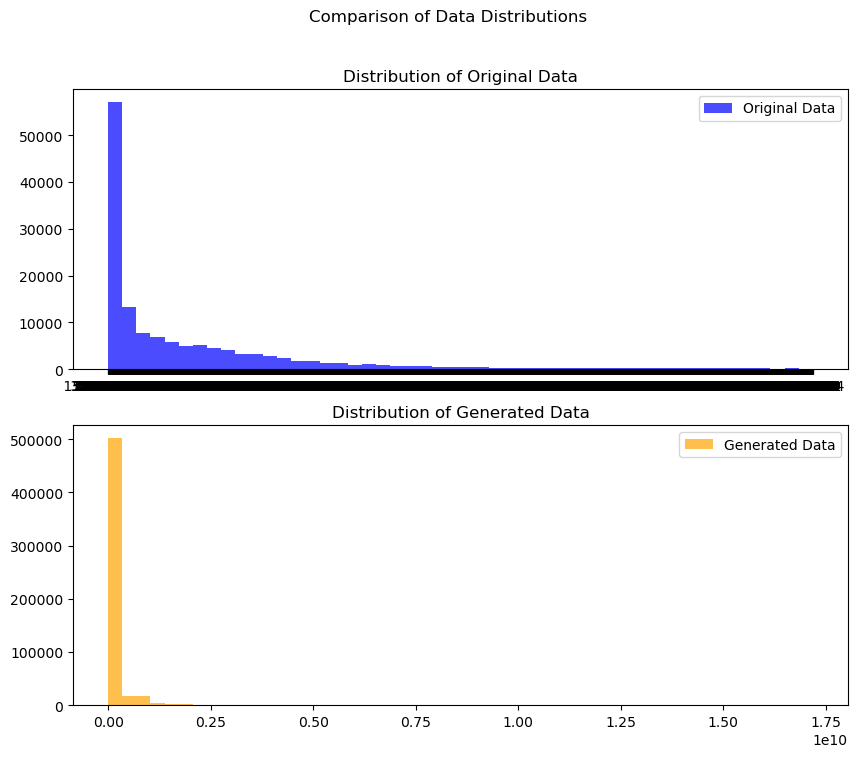

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 시각화를 위한 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
A_np = A_config.values
# mm_np = mm_sample.values
# 원래 데이터의 히스토그램
axes[0].hist(A_np.flatten(), bins=50, alpha=0.7, color='blue', label='Original Data')
axes[0].set_title('Distribution of Original Data')
axes[0].legend()

# 생성한 데이터의 히스토그램
axes[1].hist(samples.flatten(), bins=50, alpha=0.7, color='orange', label='Generated Data')
axes[1].set_title('Distribution of Generated Data')
axes[1].legend()

# 전체 그림에 대한 타이틀
plt.suptitle('Comparison of Data Distributions')

# 그림 표시
plt.show()




In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# df = pd.DataFrame(samples)

# # 박스 플롯으로 각 feature의 분포 시각화
# plt.figure(figsize=(15, 40))
# df.boxplot(rot=90, vert=False)
# plt.title("Box Plot of Feature Distributions")
# plt.xlabel("Feature Values")
# plt.show()


In [ ]:
# import seaborn as sns

# sns.kdeplot(samples.flatten())
# plt.title("Box Plot of Feature Distributions")
# plt.xlabel("Feature Values")
# plt.show()

In [21]:
samples.shape

(4000, 138)

In [22]:
### Predict Metrics with New Samples ()= configs)

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

new_X = np.array(samples)
# new_X = np.round(new_X)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)
# print(new_X_)

predictions_new = regressor.predict(new_X_) #scaling O


In [23]:
predictions_new.max()

0.8355009

In [24]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

predictions_new_df = pd.DataFrame(predictions_new) 


# inverse를 통해서 원래 데이터 형태로
inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)


new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)


new_metrics_re = new_metrics_re.reset_index()



In [25]:
# new_metrics_re = new_metrics_re.drop(['index'], axis=1)

inverse_new_pred_pd


,tps,latency
0,3081.031006,-3.307010e+04
1,13.060048,1.141200e+07
2,12.453167,1.194400e+07
3,-143.678253,1.157923e+07
4,35.083912,1.208476e+07
...,...,...
3995,99.241074,1.255430e+07
3996,-24.915060,1.147510e+07
3997,-135.588974,1.136233e+07
3998,10.885119,1.143845e+07


In [26]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)
new_metrics_re

,tps,latency
0,0.216666,20847397.0
1,0.322221,12744942.0
2,3789.313102,1076.0
3,0.166667,12510551.0
4,0.266666,10686198.0
...,...,...
4995,99.241074,12554300.0
4996,-24.915060,11475102.0
4997,-135.588974,11362326.0
4998,10.885119,11438450.0


### 인자 정리
- new_X = samples = LHS Sampling으로 생성한 데이터
<!-- - new_metrics = 생성한 데이터에 대해서 TabNET이 예측한 metrics + 원래 metrics (scaling X) -->
- new_metrics_re = 원래 metric (A_metrics) + 생성한 데이터로 예측한 metric (scaling X)
- new_Samples = 원래 config + 생성한 config (scaling X)
- newnewnew = AutoEncoder에 넣을 수 있는 데이터셋

In [27]:
new_X_pd = pd.DataFrame(new_X)
# new_X_pd = round(new_X_pd).astype(int)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

In [28]:
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples = new_Samples.round()

In [27]:
new_Samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,45125,8725130,991809,880420,1,3031954,701589288,6,6,...,433771,6395,28891,3411,3,14060,1005366874,117493,126758,1
4996,0,30585,2985469,729584,30902,0,1380965,632751948,0,13,...,19279,988885,454,4687,9,15360,263457812,105938,9051,1
4997,0,47733,9641351,135638,730445,0,1875681,566126181,0,1,...,190120,50464,60059,1403,45,1045,288865733,83967,54400,1
4998,0,27417,5189779,624842,509095,1,6334325,103902585,4,13,...,391800,233963,13030,83,12,4372,1066135727,129131,86136,1


In [28]:
new_Samples.shape


(5000, 138)

In [29]:
# new_metrics_re = new_metrics_re.drop(['index'], axis=1)

new_metrics_re


,tps,latency
0,0.216666,20847397.0
1,0.322221,12744942.0
2,3789.313102,1076.0
3,0.166667,12510551.0
4,0.266666,10686198.0
...,...,...
4995,7.756445,12412054.0
4996,10.537349,12331810.0
4997,44.614220,11254610.0
4998,20.355700,12870400.0


### AE Train set에 추가 (1000 + 4000) AUG == new_Samples

In [29]:
newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

In [31]:
newnewwnew

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397.0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942.0
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076.0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551.0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,45125,8725130,991809,880420,1,3031954,701589288,6,6,...,28891,3411,3,14060,1005366874,117493,126758,1,7.756445,12412054.0
4996,0,30585,2985469,729584,30902,0,1380965,632751948,0,13,...,454,4687,9,15360,263457812,105938,9051,1,10.537349,12331810.0
4997,0,47733,9641351,135638,730445,0,1875681,566126181,0,1,...,60059,1403,45,1045,288865733,83967,54400,1,44.614220,11254610.0
4998,0,27417,5189779,624842,509095,1,6334325,103902585,4,13,...,13030,83,12,4372,1066135727,129131,86136,1,20.355700,12870400.0


In [32]:
new_Samples.values.shape

(5000, 138)

### AutoEncoder (raw data + new data)

In [30]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler = MinMaxScaler()
scaled_samples = scaler.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=128, shuffle=True)


In [31]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [32]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(10000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

[1] tr_loss : 0.125 | val_loss : 0.125
[301] tr_loss : 0.086 | val_loss : 0.090
[601] tr_loss : 0.078 | val_loss : 0.080
[901] tr_loss : 0.070 | val_loss : 0.071
[1201] tr_loss : 0.066 | val_loss : 0.066
[1501] tr_loss : 0.064 | val_loss : 0.065
[1801] tr_loss : 0.063 | val_loss : 0.064
[2101] tr_loss : 0.062 | val_loss : 0.063
[2401] tr_loss : 0.062 | val_loss : 0.062
[2701] tr_loss : 0.061 | val_loss : 0.061
[3001] tr_loss : 0.060 | val_loss : 0.060
[3301] tr_loss : 0.059 | val_loss : 0.061
[3601] tr_loss : 0.059 | val_loss : 0.061
[3901] tr_loss : 0.058 | val_loss : 0.059
[4201] tr_loss : 0.058 | val_loss : 0.059
[4501] tr_loss : 0.057 | val_loss : 0.058
[4801] tr_loss : 0.057 | val_loss : 0.058
[5101] tr_loss : 0.056 | val_loss : 0.058
[5401] tr_loss : 0.056 | val_loss : 0.058
[5701] tr_loss : 0.056 | val_loss : 0.058
[6001] tr_loss : 0.056 | val_loss : 0.057
[6301] tr_loss : 0.055 | val_loss : 0.057
[6601] tr_loss : 0.055 | val_loss : 0.057
[6901] tr_loss : 0.055 | val_loss : 0.05

### AutoEncoder T-SNE (Reconstruction이 잘 되었는지 확인)

In [39]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

scaler = MinMaxScaler()
input_array = scaler.fit_transform(inputs_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(input_array)

# print(tsne_model.fit_transform(input_array))

In [40]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
scaler = MinMaxScaler()
output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(output_array)

 
# print(tsne_model.fit_transform(input_array))

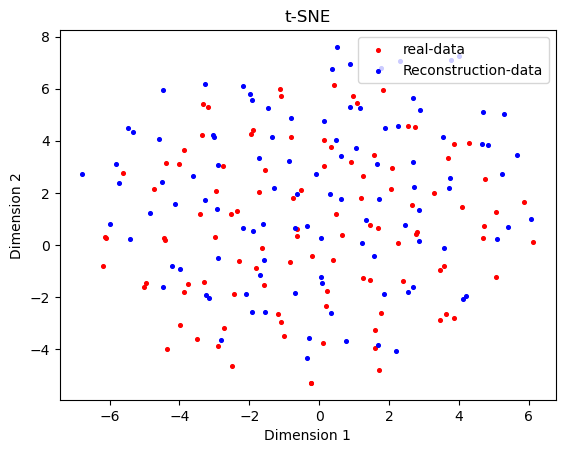

<Figure size 1000x1000 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:, 0], r[:, 1], s=7, color='red',  label='real-data')
plt.scatter(r2[:, 0], r2[:, 1], s=7, color='blue', label='Reconstruction-data')

plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


### Optimization in latent space (TabNet)
- Prediction

In [33]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.3862, 0.4333, 0.2487,  ..., 0.7448, 0.3159, 0.4838],
        [0.4475, 0.4390, 0.5008,  ..., 0.7587, 0.3885, 0.4657],
        [0.4626, 0.5987, 0.4900,  ..., 0.3362, 0.4291, 0.6004],
        ...,
        [0.6233, 0.3574, 0.4831,  ..., 0.4823, 0.5754, 0.6134],
        [0.4175, 0.3340, 0.2825,  ..., 0.3908, 0.5297, 0.3963],
        [0.5881, 0.5899, 0.5309,  ..., 0.4294, 0.3071, 0.4152]],
       device='cuda:0')


In [34]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)

# Tabnet 모델 생성
lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=500, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))





epoch 0  | loss: 0.16195 | val_0_mse: 0.05459 |  0:00:00s
epoch 10 | loss: 0.04187 | val_0_mse: 0.04316 |  0:00:06s
epoch 20 | loss: 0.02995 | val_0_mse: 0.02878 |  0:00:11s
epoch 30 | loss: 0.01132 | val_0_mse: 0.01156 |  0:00:17s
epoch 40 | loss: 0.01118 | val_0_mse: 0.00956 |  0:00:23s
epoch 50 | loss: 0.01093 | val_0_mse: 0.00879 |  0:00:28s
epoch 60 | loss: 0.00907 | val_0_mse: 0.01183 |  0:00:34s
epoch 70 | loss: 0.00917 | val_0_mse: 0.01037 |  0:00:40s
epoch 80 | loss: 0.00951 | val_0_mse: 0.0109  |  0:00:45s
epoch 90 | loss: 0.00954 | val_0_mse: 0.01176 |  0:00:51s
epoch 100| loss: 0.00987 | val_0_mse: 0.01262 |  0:00:57s
epoch 110| loss: 0.00876 | val_0_mse: 0.0113  |  0:01:02s
epoch 120| loss: 0.00895 | val_0_mse: 0.01227 |  0:01:07s
epoch 130| loss: 0.00767 | val_0_mse: 0.00952 |  0:01:13s
epoch 140| loss: 0.00923 | val_0_mse: 0.01155 |  0:01:19s
epoch 150| loss: 0.00907 | val_0_mse: 0.01045 |  0:01:24s
epoch 160| loss: 0.00854 | val_0_mse: 0.01306 |  0:01:30s
epoch 170| los

In [48]:
#Column 0 : TPS
#Column 1 : Latency

for i in range(2):  
    r2_score_column = r2_score(lt_predictions[:, i], scaled_lt_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.8280060898280014
Column 1 R2 Score: 0.7326875440205318


In [35]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [36]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
    
    def train_regression_model(self):
        X_all = np.array(self.configs)
        Y_all = np.array(self.metrics)
        
        cnt = 0
        while(True):
            bo_lt_X_train, bo_lt_X_test, bo_lt_y_train, bo_lt_y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)


            bo_y_train_tps = bo_lt_y_train[:,0][:, np.newaxis]
            bo_y_train_latecy = bo_lt_y_train[:,1][:, np.newaxis]
            bo_y_test_tps = bo_lt_y_test[:,0][:, np.newaxis]
            bo_y_test_latecy = bo_lt_y_test[:,1][:, np.newaxis]


            bo_Y_scaler_tps  = MinMaxScaler().fit(bo_y_train_tps)
            bo_Y_scaler_latecy = MinMaxScaler().fit(bo_y_train_latecy)


            bo_scaled_lt_y_train_tps = bo_Y_scaler_tps.transform(bo_y_train_tps)
            bo_scaled_lt_y_train_latency = bo_Y_scaler_latecy.transform(bo_y_train_latecy)


            bo_scaled_lt_y_test_tps = bo_Y_scaler_tps.transform(bo_y_test_tps)
            bo_scaled_lt_y_test_latency = bo_Y_scaler_latecy.transform(bo_y_test_latecy)


            bo_scaled_lt_y_train = np.concatenate([bo_scaled_lt_y_train_tps, bo_scaled_lt_y_train_latency], axis = 1)
            bo_scaled_lt_y_test = np.concatenate([bo_scaled_lt_y_test_tps, bo_scaled_lt_y_test_latency], axis = 1)

            # Tabnet 모델 생성
            bo_lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
                
            # 모델 학습
            bo_lt_regressor.fit(X_train=bo_lt_X_train, y_train=bo_scaled_lt_y_train,
                        eval_set=[(bo_lt_X_test, bo_scaled_lt_y_test)],
                        patience=200, 
                        batch_size = 128,
                        max_epochs=10000,
                        eval_metric=['mse'])

            # 테스트 데이터로 예측
            bo_lt_predictions = bo_lt_regressor.predict(bo_lt_X_test)

            accuracy = r2_score(bo_scaled_lt_y_test, bo_lt_predictions)
            cnt += 1
            
            print(cnt, accuracy)
            # print(r2_score_)
            if accuracy > 0.80 or cnt > 15:
            # if accuracy > 0.80 or cnt > 10:
                break


        self.model = bo_lt_regressor
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.model.predict(x)
        res = res[:,0] / res[:,1]

        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)

        self.acquisition_function = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)
        
        self.optimizer.maximize(n_iter=self.iteration, acquisition_function=self.acquisition_function)
    
    
    def plot_history(self):
        self.y_obs = - np.array([res["target"] for res in self.optimizer.res])
        
        self.his_inc = []
        inc = np.inf
        ## Get minimum results on each iteration
        for res in self.y_obs:
            if res < inc:
                inc = res
            self.his_inc.append(inc)
#             res.append(his_res)

        plt.plot(self.his_inc)
        plt.xlabel('Iteration')
        plt.ylabel('result')
        plt.show()

### Bayesian Optimization

In [37]:
tuner1 = BO(iteration=500, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re
           )
tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

epoch 0  | loss: 0.15707 | val_0_mse: 0.06926 |  0:00:00s
epoch 10 | loss: 0.04384 | val_0_mse: 0.0417  |  0:00:06s
epoch 20 | loss: 0.04046 | val_0_mse: 0.04089 |  0:00:11s
epoch 30 | loss: 0.01361 | val_0_mse: 0.01131 |  0:00:16s
epoch 40 | loss: 0.01109 | val_0_mse: 0.0092  |  0:00:22s
epoch 50 | loss: 0.01071 | val_0_mse: 0.01001 |  0:00:28s
epoch 60 | loss: 0.00989 | val_0_mse: 0.00965 |  0:00:34s
epoch 70 | loss: 0.00933 | val_0_mse: 0.00918 |  0:00:40s
epoch 80 | loss: 0.00863 | val_0_mse: 0.01101 |  0:00:45s
epoch 90 | loss: 0.00848 | val_0_mse: 0.01252 |  0:00:51s
epoch 100| loss: 0.00792 | val_0_mse: 0.01022 |  0:00:57s
epoch 110| loss: 0.00831 | val_0_mse: 0.01013 |  0:01:02s
epoch 120| loss: 0.0085  | val_0_mse: 0.01293 |  0:01:08s
epoch 130| loss: 0.00803 | val_0_mse: 0.00999 |  0:01:13s
epoch 140| loss: 0.00826 | val_0_mse: 0.01231 |  0:01:19s
epoch 150| loss: 0.0086  | val_0_mse: 0.01326 |  0:01:24s
epoch 160| loss: 0.00793 | val_0_mse: 0.01108 |  0:01:30s
epoch 170| los

In [53]:
ex_data = [ 0.0, 0.0, 0.2395, 0.9895, 1.0, 0.926, 0.8646, 0.0, 1.0, 0.0, 0.0, 0.7027,
            1.0, 1.0, 1.0, 1.0, 0.1659, 0.1014, 1.0, 1.0, 1.0, 0.0, 0.1875, 1.0, 0.1877,
            1.0, 0.878, 1.0, 1.0, 0.08913, 0.9167, 0.0]

In [39]:
len(ex_data)

32

In [40]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([5.6608e-12, 9.0924e-01, 1.6586e-01, 5.1881e-01, 4.2940e-01, 1.9816e-14,
        7.6824e-01, 3.4588e-01, 4.7086e-01, 8.2542e-01, 4.0601e-09, 3.4936e-01,
        5.2479e-01, 1.0000e+00, 4.6273e-01, 3.8005e-02, 6.8641e-01, 5.7594e-21,
        1.7135e-01, 8.1946e-01, 3.1347e-01, 5.4219e-01, 1.4597e-01, 3.9950e-01,
        1.0000e+00, 3.2320e-01, 2.7190e-01, 1.4362e-01, 1.8340e-01, 6.0904e-01,
        2.4308e-11, 7.5649e-02, 6.0364e-10, 1.3985e-01, 1.1279e-06, 8.3487e-01,
        1.0000e+00, 1.8313e-04, 2.2846e-01, 2.0535e-01, 4.0209e-01, 6.4366e-01,
        5.9310e-01, 5.8235e-01, 4.7095e-01, 6.1901e-01, 3.1739e-01, 8.7205e-01,
        2.9292e-01, 4.8788e-01, 1.1051e-01, 7.0719e-01, 5.0726e-01, 8.6667e-01,
        3.5763e-01, 5.9442e-01, 8.1970e-01, 7.0913e-01, 9.9967e-01, 7.1861e-01,
        1.0095e-14, 4.6642e-01, 6.1414e-01, 8.3251e-01, 1.2382e-01, 7.9620e-01,
        2.0106e-01, 8.2285e-01, 9.9978e-01, 8.1045e-01, 1.8828e-01, 9.6171e-01,
        1.0000e+00, 1.000

In [41]:
converted_values = [float(value) for value in decode_value]


In [42]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_v = np.array(real_bo_config)

rescaled_bo_config = X_scaler.inverse_transform(real_v.reshape(1,-1))



In [58]:
real_bo_config

,0
0,9.999998e-01
1,4.401544e-01
2,5.278344e-02
3,3.485471e-01
4,2.593880e-02
...,...
133,5.399971e-01
134,1.152833e-01
135,1.227782e-01
136,9.802166e-01


In [43]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.000000000,54554.684319854,1742617.249755859,518813.669681549,429113.668918610,0.000000000,8056559.277343750,371384352.000000000,3.295989990,24.762657881,...,170359.596069336,885493.516921997,35136.977744102,6899.273555040,30.134798586,4031.207519531,148957745.943664551,80229.638244629,7372.260765076,0.000000000


In [44]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 0
back_log  = 54555
binlog_cache_size  = 1742617
binlog_group_commit_sync_delay  = 518814
binlog_group_commit_sync_no_delay_count  = 429114
binlog_rows_query_log_events  = 0
binlog_stmt_cache_size  = 8056559
bulk_insert_buffer_size  = 371384352
default_week_format  = 3
div_precision_increment  = 25
end_markers_in_json  = 0
eq_range_index_dive_limit  = 3494
expire_logs_days  = 4
explicit_defaults_for_timestamp  = 1
flush_time  = 83
ft_min_word_len  = 2
ft_query_expansion_limit  = 686
general_log  = 0
group_concat_max_len  = 705
innodb_adaptive_hash_index_parts  = 420
innodb_adaptive_max_sleep_delay  = 313468
innodb_autoextend_increment  = 544
innodb_buffer_pool_size  = 3424749904
innodb_change_buffer_max_size  = 20
innodb_cmp_per_index_enabled  = 1
innodb_commit_concurrency  = 323
innodb_compression_failure_threshold_pct  = 27
innodb_compression_level  = 1
innodb_compression_pad_pct_max  = 14
innodb_concurrency_tickets  = 60905
innodb_deadlock_detect  = 0
inno